# Umoja Hack Intermediate Hackathon 2022

## Platform: Zindi Africa

### Team Cryptic

In [1]:
import numpy as np;import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from bayes_opt import BayesianOptimization

In [2]:
train_data=pd.read_csv(r"C:\Users\DELL\Documents\UmojaHack2022\train.csv")
test_data=pd.read_csv(r"C:\Users\DELL\Documents\UmojaHack2022\test.csv")
policy=pd.read_csv(r"C:\Users\DELL\Documents\UmojaHack2022\policies.csv")
datadict=pd.read_csv(r"C:\Users\DELL\Documents\UmojaHack2022\DataDictionary.csv")
sample_sub=pd.read_csv(r"C:\Users\DELL\Documents\UmojaHack2022\SampleSubmission.csv")
train_data.shape

(9376, 15)

In [3]:
train_data.head(5)

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.0,prod00027,ag00068,cob00031,rt00006,2021-05-13,ct0003,rf0001,pc0007,sc00022,br00006,82150.00
1,ID_KQ5TJMVLJ4EP,pol000006869,claim0005272,16000.0,prod00005,ag00226,cob00010,rt00032,2018-05-13,ct0003,rf0001,pc0007,sc00023,br00002,3780.24
2,ID_NYHI7WJGGIAE,pol000006135,claim0004147,3000.0,prod00029,ag00037,cob00010,rt00026,2018-08-18,ct0003,rf0001,pc0007,sc00024,br00002,2196.50
3,ID_ROMMDCXYUXN5,pol000008991,claim0009962,6000.0,prod00005,ag00037,cob00009,rt00032,2018-12-20,ct0003,rf0001,pc0007,sc00021,br00001,105.67
4,ID_2OTD9NX8L73D,pol000007768,claim0007346,26850.0,prod00015,ag00226,cob00034,rt00023,2018-11-07,ct0001,rf0001,pc0007,sc00021,br00001,1605.64


In [4]:
# Assigning Targets and Id's
y_train=train_data.target
test_id=test_data.claim_id


In [5]:
# Add Train and test data
data=train_data.drop('target',axis=1).append(test_data,ignore_index=True)
data.shape

(13395, 14)

In [6]:
data.isnull().sum()

claim_id               0
policy_number        127
claim_number           0
sum_insured            0
product                0
agent                  0
class_of_business      0
risk_type              0
loss_date              0
client_type            0
renewal_frequency      0
primary_cause          0
secondary_cause        0
branch                 0
dtype: int64

In [7]:
test_data.isnull().sum()

claim_id              0
policy_number        41
claim_number          0
sum_insured           0
product               0
agent                 0
class_of_business     0
risk_type             0
loss_date             0
client_type           0
renewal_frequency     0
primary_cause         0
secondary_cause       0
branch                0
dtype: int64

#### Policy Data

In [8]:
print('Policy Data Shape: {}'.format(policy.shape))
policy.head(5)

Policy Data Shape: (30371, 10)


,policy_number,product_code,trans_date,from_date,to_date,agent,class_of_business,client_type,renewal_frequency,branch
0,pol000006995,prod00033,2017-07-01 08:24:55.800,2017-07-01 00:00:00.000,2018-07-01 00:00:00.000,ag00005,cob00035,ct0001,rf0002,br00002
1,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00009,ct0003,rf0001,br00006
2,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00031,ct0003,rf0001,br00006
3,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00031,ct0003,rf0001,br00002
4,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00009,ct0003,rf0001,br00002


In [9]:
# Duplicated Policy data
print('Number of Duplicated Policies: {}'.format(policy.duplicated().sum()))

Number of Duplicated Policies: 0


In [10]:
# Duplicated Policy ID's
policy.policy_number.duplicated().sum()

25154

In [11]:
policy[policy.policy_number.isin(['pol000005951'])]

,policy_number,product_code,trans_date,from_date,to_date,agent,class_of_business,client_type,renewal_frequency,branch
3859,pol000005951,prod00015,2018-01-12 16:04:44.230,2018-01-01 00:00:00.000,2018-12-31 00:00:00.000,ag00004,cob00034,ct0001,rf0002,br00002
4398,pol000005951,prod00015,2018-01-23 11:58:28.890,2018-01-12 00:00:00.000,2018-12-31 00:00:00.000,ag00004,cob00034,ct0001,rf0002,br00002
4399,pol000005951,prod00015,2018-01-23 12:10:43.130,2018-01-15 00:00:00.000,2018-12-31 00:00:00.000,ag00004,cob00034,ct0001,rf0002,br00002
4423,pol000005951,prod00015,2018-01-23 17:08:08.783,2018-01-17 00:00:00.000,2018-12-31 00:00:00.000,ag00004,cob00034,ct0001,rf0002,br00002
5435,pol000005951,prod00015,2018-02-13 15:50:41.227,2018-01-25 00:00:00.000,2018-12-31 00:00:00.000,ag00004,cob00034,ct0001,rf0002,br00002
...,...,...,...,...,...,...,...,...,...,...
30068,pol000005951,prod00015,2021-10-11 16:41:27.347,2021-05-01 00:00:00.000,2021-12-31 00:00:00.000,ag00004,cob00034,ct0001,rf0002,br00002
30164,pol000005951,prod00015,2021-10-18 12:21:48.937,2021-09-29 00:00:00.000,2021-12-31 00:00:00.000,ag00004,cob00034,ct0001,rf0002,br00002
30168,pol000005951,prod00015,2021-10-18 12:51:17.770,2021-10-01 00:00:00.000,2021-12-31 00:00:00.000,ag00004,cob00034,ct0001,rf0002,br00002
30170,pol000005951,prod00015,2021-10-18 14:25:11.497,2021-10-06 00:00:00.000,2021-12-31 00:00:00.000,ag00004,cob00034,ct0001,rf0002,br00002


### Train and test Data

In [12]:
train_data.head(5)

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.0,prod00027,ag00068,cob00031,rt00006,2021-05-13,ct0003,rf0001,pc0007,sc00022,br00006,82150.00
1,ID_KQ5TJMVLJ4EP,pol000006869,claim0005272,16000.0,prod00005,ag00226,cob00010,rt00032,2018-05-13,ct0003,rf0001,pc0007,sc00023,br00002,3780.24
2,ID_NYHI7WJGGIAE,pol000006135,claim0004147,3000.0,prod00029,ag00037,cob00010,rt00026,2018-08-18,ct0003,rf0001,pc0007,sc00024,br00002,2196.50
3,ID_ROMMDCXYUXN5,pol000008991,claim0009962,6000.0,prod00005,ag00037,cob00009,rt00032,2018-12-20,ct0003,rf0001,pc0007,sc00021,br00001,105.67
4,ID_2OTD9NX8L73D,pol000007768,claim0007346,26850.0,prod00015,ag00226,cob00034,rt00023,2018-11-07,ct0001,rf0001,pc0007,sc00021,br00001,1605.64


In [13]:
# Duplicated data
print('Number of Duplicated Datapoints: {}'.format(data.duplicated().sum()))

Number of Duplicated Datapoints: 0


In [14]:
data.policy_number.value_counts()

pol000006026    369
pol000007844    170
pol000007723    168
pol000005951    150
pol000005960    146
               ... 
pol000008626      1
pol000005705      1
pol000010880      1
pol000009086      1
pol000006923      1
Name: policy_number, Length: 5217, dtype: int64

In [15]:
data.claim_number.value_counts()

claim0012596    3
claim0000310    3
claim0000005    3
claim0010821    3
claim0001351    3
               ..
claim0008299    1
claim0012138    1
claim0011193    1
claim0014074    1
claim0000080    1
Name: claim_number, Length: 12995, dtype: int64

In [16]:
data.sum_insured.describe()

count    1.339500e+04
mean     1.133921e+07
std      1.879285e+08
min      0.000000e+00
25%      7.000000e+03
50%      5.400000e+04
75%      4.400000e+05
max      1.414319e+10
Name: sum_insured, dtype: float64

In [17]:
# Plotting Histogram of certain Features
def Histplot(feature,color='r',size=(20,20),quan=False):
    plt.figure(figsize=size)
    sns.set_style('whitegrid')
    sns.histplot(feature,color=color)
    quantiles=[0.25,0.50,0.75,0.90]
    if quan:
        for quantile in quantiles:
            plt.axvline(feature.quantile(quantile),color='k')
    

In [18]:
pow_trf=PowerTransformer('box-cox')
pow_trf.fit(data.sum_insured.values.reshape(-1,1)+1)

PowerTransformer(method='box-cox')

In [19]:
pow_trf.lambdas_

array([0.07124363])

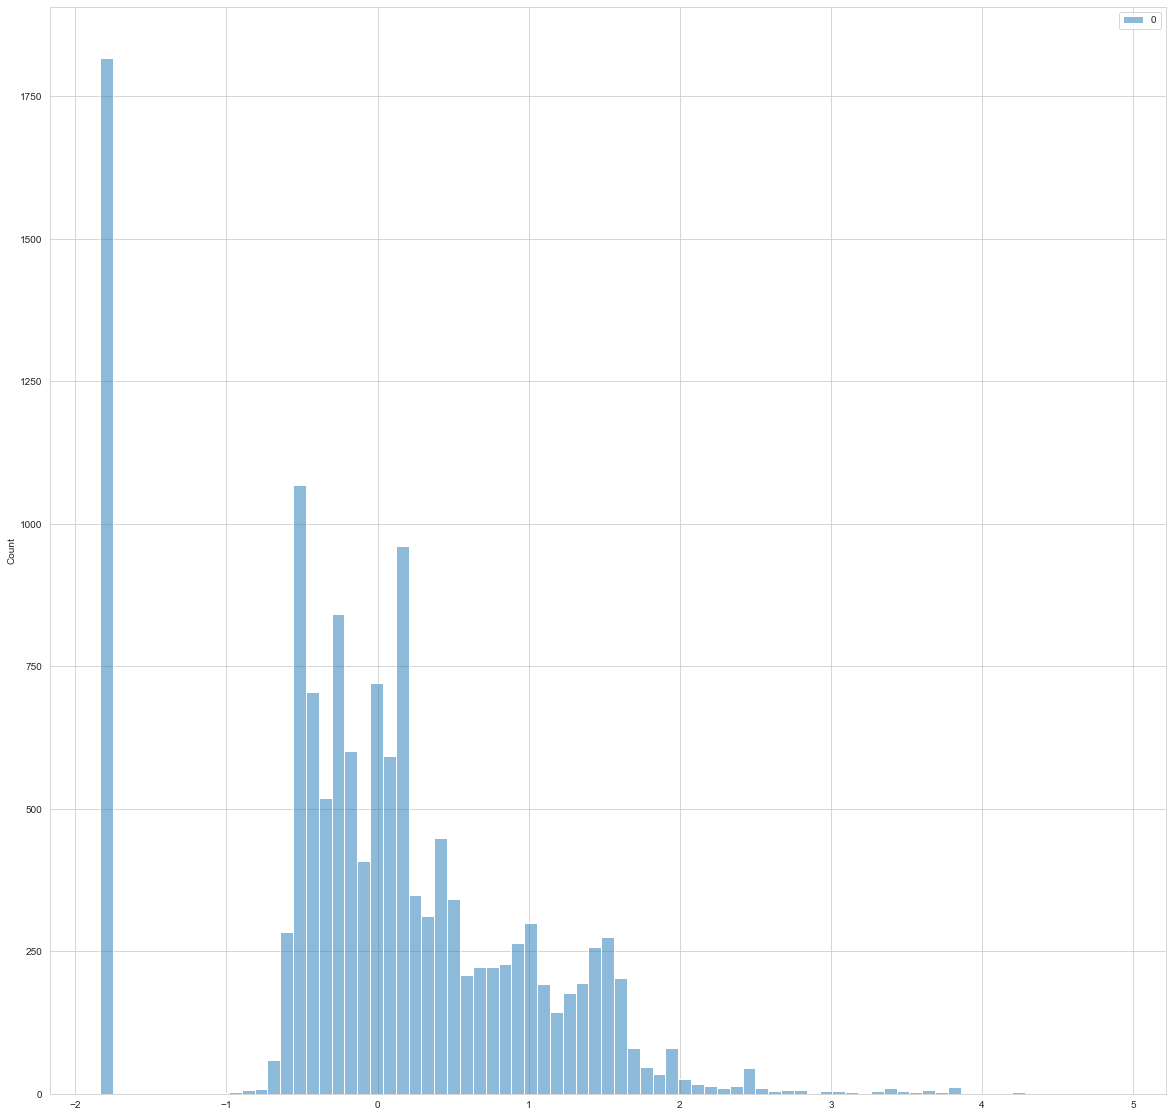

In [20]:
Histplot(pow_trf.fit_transform(data.sum_insured.values.reshape(-1,1)+1),color='r')

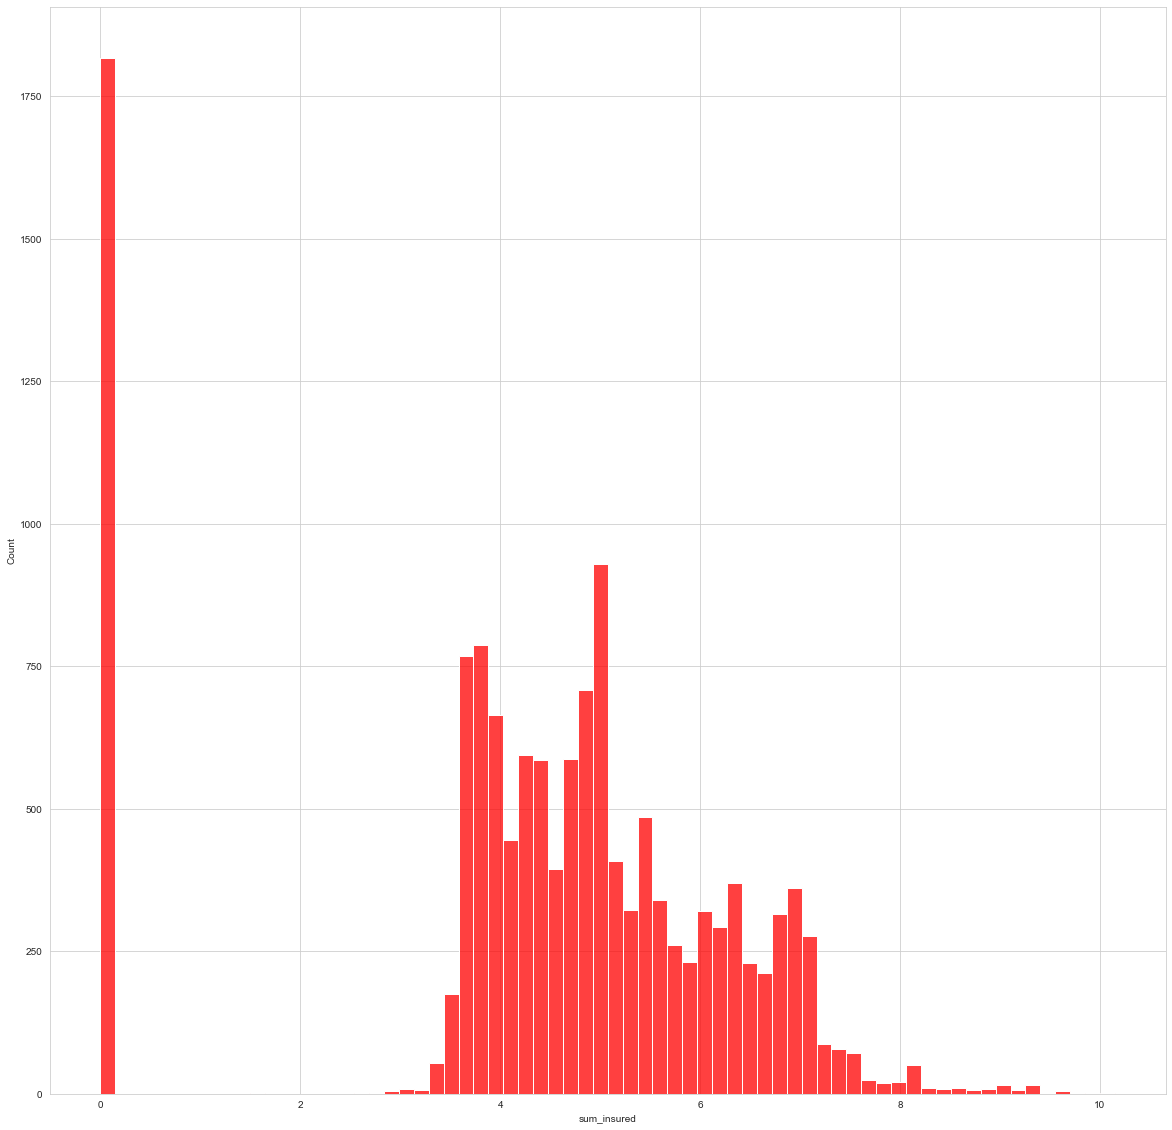

In [21]:
Histplot(np.log10(data.sum_insured+1),color='r')

In [22]:
# Correlation of Sum Insured
pow_insured=pow_trf.fit_transform(data.sum_insured.values.reshape(-1,1)+1).flatten()[:train_data.shape[0]]
test_pow_insured=pow_trf.transform(test_data.sum_insured.values.reshape(-1,1)+1)
log_insured=np.log10(data.sum_insured+1)[:train_data.shape[0]]
log_insured.corr(y_train)
pd.Series(pow_insured).corr(y_train)

0.23372197938246758

<AxesSubplot:ylabel='target'>

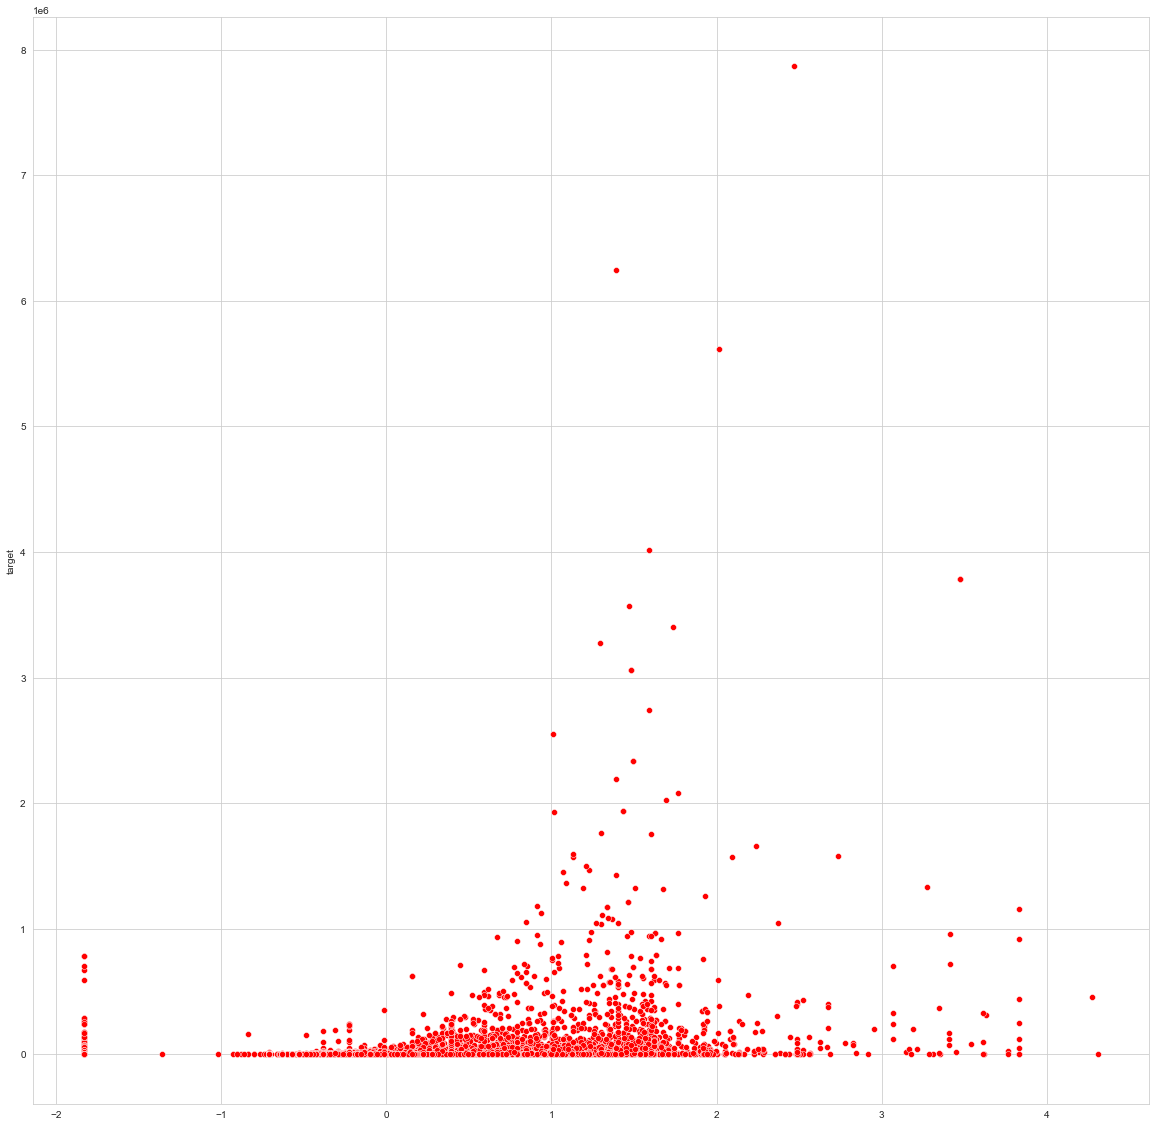

In [23]:
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.scatterplot(x=pow_insured,y=y_train,color='r')

<AxesSubplot:xlabel='sum_insured'>

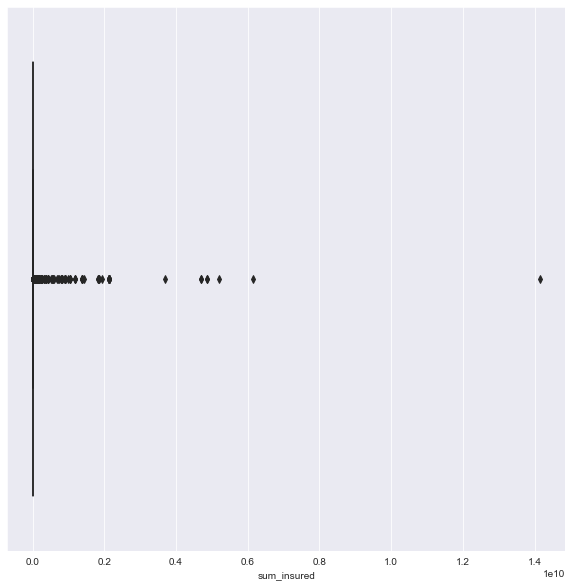

In [24]:
# Boxplot of Sum assured
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.boxplot(data=data,x='sum_insured',color='g')


<AxesSubplot:>

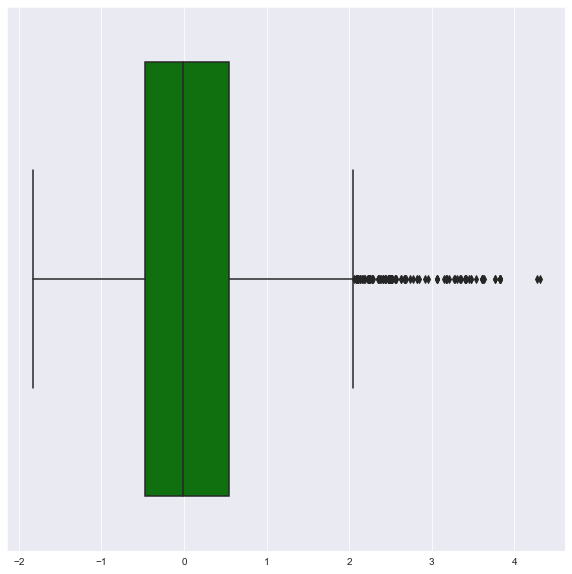

In [25]:
# Boxplot of Log of Sum assured
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.boxplot(x=pow_insured,color='g')


### Integer Extraction

In [26]:
# Function to Extract Integers from Products
def Integer_extraction(feature,no_of_int=2):
    a=[]
    for f in feature:
        a.append(int(f[-no_of_int:]))
    return a

In [27]:
cols=['product','agent','class_of_business','risk_type','client_type','renewal_frequency','secondary_cause','branch','primary_cause']
train=train_data.copy()
for col in cols:
    train[col]=Integer_extraction(train_data[col])
train.head(5)

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.0,27,68,31,6,2021-05-13,3,1,7,22,6,82150.00
1,ID_KQ5TJMVLJ4EP,pol000006869,claim0005272,16000.0,5,26,10,32,2018-05-13,3,1,7,23,2,3780.24
2,ID_NYHI7WJGGIAE,pol000006135,claim0004147,3000.0,29,37,10,26,2018-08-18,3,1,7,24,2,2196.50
3,ID_ROMMDCXYUXN5,pol000008991,claim0009962,6000.0,5,37,9,32,2018-12-20,3,1,7,21,1,105.67
4,ID_2OTD9NX8L73D,pol000007768,claim0007346,26850.0,15,26,34,23,2018-11-07,1,1,7,21,1,1605.64


In [28]:
cols=['product','agent','class_of_business','risk_type','client_type','renewal_frequency','secondary_cause','branch','primary_cause']
test=test_data.copy()
for col in cols:
    test[col]=Integer_extraction(test_data[col])
test.head(5)

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch
0,ID_4RO0KZI9BBW2,pol000007115,claim0005757,300000.0,5,68,9,32,2021-03-11,3,1,7,29,4
1,ID_GTE9ZUJ9GZ97,pol000006008,claim0003037,2700000.0,15,64,34,23,2020-06-25,1,3,7,22,2
2,ID_RUVIYRKWZ4RG,pol000007651,claim0006507,4071352.0,12,21,16,15,2019-03-14,1,1,11,49,1
3,ID_J81X8SWU6JYN,pol000010981,claim0013636,0.0,2,37,2,2,2018-12-04,1,2,2,12,5
4,ID_94NM3JJAWWOQ,pol000005926,claim0001750,1607178.0,15,37,34,23,2019-09-18,1,3,7,22,2


In [29]:
train.corr()

,sum_insured,product,agent,class_of_business,risk_type,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
sum_insured,1.000000,-0.058226,-0.003520,-0.059087,-0.087700,-0.054448,0.042714,-0.082974,-0.069100,0.041295,0.102604
product,-0.058226,1.000000,0.003414,0.421078,-0.266836,0.018097,0.000415,0.224739,0.125715,-0.020577,0.004257
agent,-0.003520,0.003414,1.000000,-0.065303,0.098253,-0.055109,-0.064468,0.078273,0.053465,0.273312,0.013212
class_of_business,-0.059087,0.421078,-0.065303,1.000000,-0.242113,-0.427346,0.171981,0.108724,0.060348,-0.126651,0.028270
risk_type,-0.087700,-0.266836,0.098253,-0.242113,1.000000,0.065548,-0.007618,0.372485,0.270853,0.162672,-0.090253
client_type,-0.054448,0.018097,-0.055109,-0.427346,0.065548,1.000000,-0.292224,-0.080134,-0.067717,0.125338,-0.098397
renewal_frequency,0.042714,0.000415,-0.064468,0.171981,-0.007618,-0.292224,1.000000,0.008704,0.043279,0.023327,0.079784
primary_cause,-0.082974,0.224739,0.078273,0.108724,0.372485,-0.080134,0.008704,1.000000,0.454450,0.090475,-0.022899
secondary_cause,-0.069100,0.125715,0.053465,0.060348,0.270853,-0.067717,0.043279,0.454450,1.000000,0.010664,-0.013484
branch,0.041295,-0.020577,0.273312,-0.126651,0.162672,0.125338,0.023327,0.090475,0.010664,1.000000,-0.027489


In [30]:
pow_trf_1=PowerTransformer(method='box-cox')
y=pow_trf_1.fit_transform(y_train.values.reshape(-1,1)+1)
y=y.flatten()
y

array([ 1.33664209,  0.21841982,  0.04658498, ...,  0.04367828,
       -0.23706492, -0.0886075 ])

In [31]:
test_pow_insured=pow_trf.transform(test_data.sum_insured.values.reshape(-1,1)+1)
test['sum_insured']=test_pow_insured
test.drop(['claim_id','policy_number','claim_number','loss_date'],axis=1,inplace=True)
test.head(5)

,sum_insured,product,agent,class_of_business,risk_type,client_type,renewal_frequency,primary_cause,secondary_cause,branch
0,0.446180,5,68,9,32,3,1,7,29,4
1,1.097906,15,64,34,23,1,3,7,22,2
2,1.231460,12,21,16,15,1,1,11,49,1
3,-1.833795,2,37,2,2,1,2,2,12,5
4,0.934708,15,37,34,23,1,3,7,22,2


In [32]:
train['sum_insured']=pow_insured
train.drop(['claim_id','policy_number','claim_number','loss_date','target'],axis=1,inplace=True)
train.head(5)

,sum_insured,product,agent,class_of_business,risk_type,client_type,renewal_frequency,primary_cause,secondary_cause,branch
0,0.446180,27,68,31,6,3,1,7,22,6
1,-0.278647,5,26,10,32,3,1,7,23,2
2,-0.629486,29,37,10,26,3,1,7,24,2
3,-0.489281,5,37,9,32,3,1,7,21,1
4,-0.161391,15,26,34,23,1,1,7,21,1


In [33]:
## Drop from test and train
train_data.drop(['claim_id','policy_number','claim_number','loss_date','target'],axis=1,inplace=True)

<AxesSubplot:xlabel='target', ylabel='Count'>

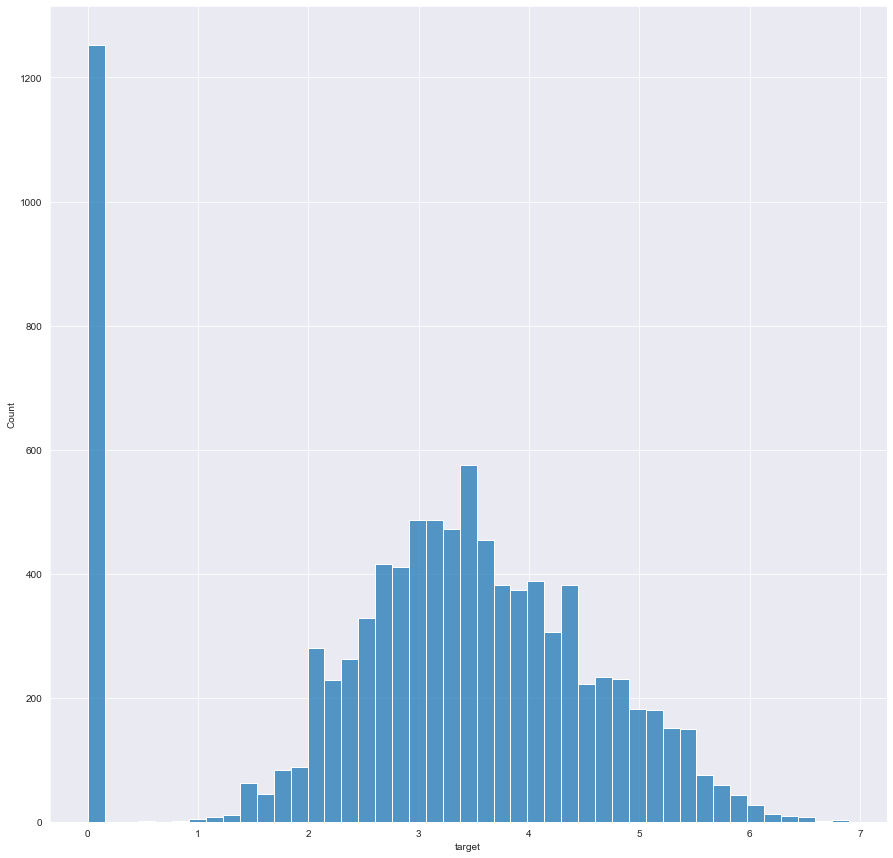

In [34]:
plt.figure(figsize=(15,15))
sns.histplot(np.log10(y_train+1))

### Model Building

#### Preprocessing 

In [35]:
std_scaler=StandardScaler()
std_scaler.fit(train)

StandardScaler()

In [36]:
train_temp=std_scaler.transform(train)
test_temp=std_scaler.transform(test)
train_temp.shape

(9376, 10)

In [37]:
# Function to analyse Result
def score_evaluate(est,x,y_target):
    score=cross_val_predict(estimator=est,X=x,y=y_target,cv=5)
    score=pow_trf_1.inverse_transform(score.reshape(-1,1))-1
    est.fit(x,y_target)
    pre=est.predict(x)
    pre=pow_trf_1.inverse_transform(pre.reshape(-1,1))-1
    error=mean_absolute_error(y_train,pre)
    print('MAE of Estimator: {:.4f}'.format(error))
    print('MAE of Cross Validation Estimator: {:.4f}'.format(mean_absolute_error(y_train,score)))
    print('R2_Score: {}'.format(r2_score(y_train,score)))
    return score,error

In [46]:
# Test Submit Function
def test_submit(model):
    test_pred=model.predict(test)
    test_pred=pow_trf_1.inverse_transform(test_pred.reshape(-1,1))
    test_pred=test_pred.flatten()
    sub_file=pd.DataFrame()
    sub_file['claim_id']=test_id
    sub_file['target']=test_pred
    return sub_file

In [38]:
def submission(sub_file,filename):
    sub_file.to_csv(r'C:\Users\DELL\Documents\UmojaHack2022\Submission_files\\'+filename,index=False)

#### Linear Regression

In [39]:
lin_reg=LinearRegression()
lin_reg.fit(train,y)

LinearRegression()

In [40]:
test_pre,error=score_evaluate(lin_reg,train,y)

MAE of Estimator: 40046.8971
MAE of Cross Validation Estimator: 40067.1184
R2_Score: -0.01752445269045455


The score from the Linear Regression Least squares alggorithm will serve as our baseline model

### Random Forest

In [41]:
forest_reg=RandomForestRegressor(random_state=42,n_estimators=500)
forest_reg.fit(train,y)

RandomForestRegressor(n_estimators=500, random_state=42)

In [42]:
test_pre=score_evaluate(forest_reg,train,y)

MAE of Estimator: 25819.0736
MAE of Cross Validation Estimator: 36888.4876
R2_Score: 0.0987893485926854


In [43]:
# Function To Build Array of Feature Importance
def Feature_importance(feature):
    a=pd.DataFrame()
    a['Features']=feature
    a.index=train_data.columns
    a.sort_values(by='Features',inplace=True)
    return a


<AxesSubplot:>

<Figure size 1440x1440 with 0 Axes>

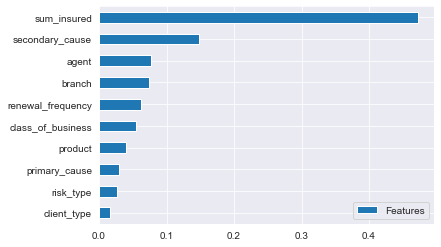

In [44]:
a=Feature_importance(forest_reg.feature_importances_)
plt.figure(figsize=(20,20))
a.plot(kind='barh')

In [48]:
forest_test_pre=test_submit(forest_reg)
forest_test_pre

,claim_id,target
0,ID_4RO0KZI9BBW2,87999.250456
1,ID_GTE9ZUJ9GZ97,9009.157407
2,ID_RUVIYRKWZ4RG,1593.837981
3,ID_J81X8SWU6JYN,3287.438154
4,ID_94NM3JJAWWOQ,389.137569
...,...,...
4014,ID_F08UFUIVVMR8,13229.578990
4015,ID_KODD3CK5SV0X,64.729259
4016,ID_59003DPSZQ16,112200.050843
4017,ID_B0C9XF5SIHGO,1963.096397


### Gradient Boosting

In [49]:
grad_reg=GradientBoostingRegressor(random_state=42)
grad_reg.fit(train,y)

GradientBoostingRegressor(random_state=42)

In [50]:
test_pre=score_evaluate(grad_reg,train,y)

MAE of Estimator: 36997.7910
MAE of Cross Validation Estimator: 37508.6922
R2_Score: 0.01921481383269741


In [51]:
# Bayesian Optimization
def model_optimize(max_depth,min_samples_split,min_samples_leaf,max_leaf_nodes):
    penalty=['l2','l1','elasticnet'];
    grad_reg_1=GradientBoostingRegressor(random_state=42,max_depth=round(max_depth),max_leaf_nodes=round(max_leaf_nodes),min_samples_leaf=round(min_samples_leaf),n_estimators=300,min_samples_split=round(min_samples_split))
    grad_pre=cross_val_predict(grad_reg_1,train,y,cv=5)
    score=-mean_absolute_error(y_train,pow_trf_1.inverse_transform(grad_pre.reshape(-1,1))-1)
    return score

In [52]:
params_nn=dict(max_leaf_nodes=(2,100),min_samples_leaf=(2,50),max_depth=(2,20),min_samples_split=[2,50])
params_nn

{'max_leaf_nodes': (2, 100),
 'min_samples_leaf': (2, 50),
 'max_depth': (2, 20),
 'min_samples_split': [2, 50]}

In [53]:
# Fitting Bayesian Optimization
nn_bo=BayesianOptimization(f=model_optimize,pbounds=params_nn,random_state=42,verbose=1)
nn_bo.maximize(init_points=15,n_iter=4)
for i,res in enumerate(nn_bo.res):
    print('Iteration {}: \n\t{}'.format(i,res))
print(nn_bo.max)

|   iter    |  target   | max_depth | max_le... | min_sa... | min_sa... |
-------------------------------------------------------------------------
|  2        | -3.678e+0 |  4.808    |  17.29    |  4.788    |  43.58    |
|  4        | -3.654e+0 |  16.98    |  22.81    |  10.73    |  10.8     |
|  11       | -3.635e+0 |  4.197    |  50.53    |  3.651    |  45.65    |
Iteration 0: 
	{'target': -37113.309256186774, 'params': {'max_depth': 8.741722139252525, 'max_leaf_nodes': 95.17000202817178, 'min_samples_leaf': 37.135709206947446, 'min_samples_split': 30.735607241457757}}
Iteration 1: 
	{'target': -36780.034073807576, 'params': {'max_depth': 4.808335527963857, 'max_leaf_nodes': 17.28746299294786, 'min_samples_leaf': 4.788013384073574, 'min_samples_split': 43.57645499719689}}
Iteration 2: 
	{'target': -36990.19518641179, 'params': {'max_depth': 12.82007021137776, 'max_leaf_nodes': 71.39111262401246, 'min_samples_leaf': 2.9880557261985174, 'min_samples_split': 48.55567290377573}}
Iterati

In [54]:
grad_reg=GradientBoostingRegressor(random_state=42,max_depth=4,min_samples_split=46,min_samples_leaf=4,max_leaf_nodes=51,n_estimators=300)
grad_reg.fit(train,y)

GradientBoostingRegressor(max_depth=4, max_leaf_nodes=51, min_samples_leaf=46,
                          min_samples_split=45, n_estimators=300,
                          random_state=42)

In [55]:
# Bayesian Tuned Scores
test_pre=score_evaluate(grad_reg,train,y)

MAE of Estimator: 35513.7250
MAE of Cross Validation Estimator: 37113.6726
R2_Score: 0.03754529060968781


In [56]:
grad_test_pre=test_submit(grad_reg)
grad_test_pre

,claim_id,target
0,ID_4RO0KZI9BBW2,105395.758919
1,ID_GTE9ZUJ9GZ97,10016.004786
2,ID_RUVIYRKWZ4RG,834.352019
3,ID_J81X8SWU6JYN,913.503122
4,ID_94NM3JJAWWOQ,4567.678287
...,...,...
4014,ID_F08UFUIVVMR8,18839.929341
4015,ID_KODD3CK5SV0X,468.150789
4016,ID_59003DPSZQ16,42831.689317
4017,ID_B0C9XF5SIHGO,11432.325688


<AxesSubplot:>

<Figure size 1440x1440 with 0 Axes>

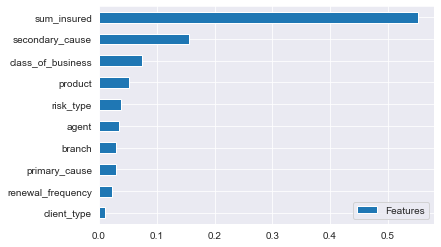

In [57]:
grad_feature_plot=Feature_importance(grad_reg.feature_importances_)
plt.figure(figsize=(20,20))
grad_feature_plot.plot(kind='barh')

### XGBOOST

In [58]:
xgb_reg=XGBRegressor(verbosity=0,random_state=42,learning_rate =0.1,n_estimators=100,objective= 'reg:linear',nthread=4,scale_pos_weight=1)
xgb_reg

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, nthread=4, num_parallel_tree=None,
             objective='reg:linear', predictor=None, random_state=42,
             reg_alpha=None, reg_lambda=None, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=None,
             verbosity=0)

In [59]:
xgb_1=score_evaluate(xgb_reg,train,y)

MAE of Estimator: 33193.2141
MAE of Cross Validation Estimator: 36432.6201
R2_Score: 0.09344527156466464


In [60]:
# Bayesian Optimizaion
def model_optimize(max_depth,min_child_weight,gamma,subsample,colsample_bytree):
    loss_list=['epsilon_insensitive','squared_epsilon_insensitive']
    lr=['adaptive','invscaling','constant','optimal']
    xgb_reg_1=XGBRegressor(verbosity=0,random_state=42,learning_rate =0.1,max_depth=round(max_depth),min_child_weight=round(min_child_weight),subsample=subsample,colsample_bytree=colsample_bytree,n_estimators=200,objective= 'reg:linear',nthread=4,scale_pos_weight=1)
    xgb_pre=cross_val_predict(xgb_reg_1,train,y,cv=5)
    score=mean_absolute_error(y_train,pow_trf_1.inverse_transform(xgb_pre.reshape(-1,1))-1)
    return -score

In [61]:
params_nn=dict(max_depth=(1,20),min_child_weight=(1,10),gamma=(0,0.5),subsample=(0.1,0.9),colsample_bytree=(0.1,0.9))
params_nn

{'max_depth': (1, 20),
 'min_child_weight': (1, 10),
 'gamma': (0, 0.5),
 'subsample': (0.1, 0.9),
 'colsample_bytree': (0.1, 0.9)}

In [62]:
# Fitting Bayesian Optimization
nn_bo=BayesianOptimization(f=model_optimize,pbounds=params_nn,random_state=42,verbose=1)
nn_bo.maximize(init_points=15,n_iter=4)
for i,res in enumerate(nn_bo.res):
    print('Iteration {}: \n\t{}'.format(i,res))
print(nn_bo.max)

|   iter    |  target   | colsam... |   gamma   | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------
|  2        | -3.634e+0 |  0.2248   |  0.02904  |  17.46    |  6.41     |  0.6665   |
Iteration 0: 
	{'target': -37007.763487838434, 'params': {'colsample_bytree': 0.39963209507789, 'gamma': 0.4753571532049581, 'max_depth': 14.907884894416696, 'min_child_weight': 6.387926357773329, 'subsample': 0.22481491235394924}}
Iteration 1: 
	{'target': -36337.47368906785, 'params': {'colsample_bytree': 0.22479561626896213, 'gamma': 0.02904180608409973, 'max_depth': 17.457346769723767, 'min_child_weight': 6.41003510568888, 'subsample': 0.6664580622368363}}
Iteration 2: 
	{'target': -38055.93399653129, 'params': {'colsample_bytree': 0.11646759543664197, 'gamma': 0.48495492608099716, 'max_depth': 16.816410175208013, 'min_child_weight': 2.9110519961044856, 'subsample': 0.24545997376568052}}
Iteration 3: 
	{'target': -36857.11266620

In [64]:
xgb_reg=XGBRegressor(verbosity=0,random_state=42,learning_rate =0.1,gamma=0.03,max_depth=17,min_child_weight=6,subsample=0.666,colsample_bytree=0.225,n_estimators=100,objective= 'reg:linear',nthread=4,scale_pos_weight=1)
xgb_reg.fit(train,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.225,
             enable_categorical=False, gamma=0.03, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=17,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.666,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [65]:
test_pre=score_evaluate(xgb_reg,train,y)

MAE of Estimator: 33757.5520
MAE of Cross Validation Estimator: 37457.6290
R2_Score: 0.04225430069539937


In [68]:
xgb_test_pre=test_submit(xgb_reg)
xgb_test_pre

,claim_id,target
0,ID_4RO0KZI9BBW2,58777.550781
1,ID_GTE9ZUJ9GZ97,15076.403320
2,ID_RUVIYRKWZ4RG,1139.287109
3,ID_J81X8SWU6JYN,1792.190186
4,ID_94NM3JJAWWOQ,8727.019531
...,...,...
4014,ID_F08UFUIVVMR8,22194.062500
4015,ID_KODD3CK5SV0X,570.751831
4016,ID_59003DPSZQ16,20959.710938
4017,ID_B0C9XF5SIHGO,6438.669922


In [69]:
## Combining the Three Predictions 

In [70]:
a=forest_test_pre.target.values
b=grad_test_pre.target.values
c=xgb_test_pre.target.values

In [71]:
test_pre=(a+b+c)/3

In [72]:
# Building Submission File
sub_file=pd.DataFrame()
sub_file['claim_id']=test_id
sub_file['target']=test_pre
sub_file.head(5)

,claim_id,target
0,ID_4RO0KZI9BBW2,84057.520052
1,ID_GTE9ZUJ9GZ97,11367.188505
2,ID_RUVIYRKWZ4RG,1189.159037
3,ID_J81X8SWU6JYN,1997.710487
4,ID_94NM3JJAWWOQ,4561.278463


In [73]:
submission(sub_file,'3_Combined_Pred.csv')